In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Adidas US Sales Datasets.csv')

# Business problems that can be solved using this dataset:

1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?
2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?
3. Profit Margin Analysis: Does the profit margin significantly impact sales?
4. Efficiency of Sales Methods: Which sales method is more effective - in-store or online?
5. Price Optimization: Is there a specific price range that achieves better sales than others?
6. Product Portfolio Optimization I: Determine which products are most profitable, segmented by location.
7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.
8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.
9. Predictive Sales Analysis: Develop a forecast for monthly sales.

# Performing Exploratory Data Analysis (EDA)

In [ ]:
data.shape

(9648, 13)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [ ]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [ ]:
data.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,24-01-2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet
9647,Foot Locker,1185732,22-02-2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,$29.00,83,"$2,407",$650,27%,Outlet


In [ ]:
data['Total Sales'] = data['Total Sales'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Units Sold'] = data['Units Sold'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Operating Profit'] = data['Operating Profit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data['Operating Margin'] = data['Operating Margin'].astype(str).str.replace(r'[%, ]', '', regex=True).astype(float)
data['Price per Unit'] = data['Price per Unit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

In [ ]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

<ipython-input-5-bbbe9b18b19f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])


# 1. Sales Performance Analysis: Which products are excelling in sales, and which are underperforming?

In [ ]:
total_revenue = data['Total Sales'].sum()
total_revenue

899902125.0

In [ ]:
product_sales = data.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()

In [ ]:
top_performing_products = product_sales.sort_values(by='Total Sales',ascending=False).head()

print("Top Performing Products:")

top_performing_products

Top Performing Products:


,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320.0
3,Women's Apparel,179038860.0,433827.0
1,Men's Athletic Footwear,153673680.0,435526.0
5,Women's Street Footwear,128002813.0,392269.0
0,Men's Apparel,123728632.0,306683.0


In [ ]:
underperforming_products = product_sales.sort_values(by='Total Sales',ascending=True).head()

print("\nUnderperforming Products:")
underperforming_products


Underperforming Products:


,Product,Total Sales,Units Sold
4,Women's Athletic Footwear,106631896.0,317236.0
0,Men's Apparel,123728632.0,306683.0
5,Women's Street Footwear,128002813.0,392269.0
1,Men's Athletic Footwear,153673680.0,435526.0
3,Women's Apparel,179038860.0,433827.0


Men's Street Footwear are highest sold products with sales of 208,826,244 and the most underperforming product is Women's Athletic Footwear with sales of 106,631,896.

# 2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?

In [ ]:
three_columns_grouped = data.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()
three_columns_sorted = three_columns_grouped.sort_values(by=['City','Units Sold'],ascending=[True,False])
top_performers = three_columns_sorted.groupby('City').head(1)
worst_performers = three_columns_sorted.groupby('City').tail(1)

print("Top Performing Retailers in Each City:")
top_performers.head()

Top Performing Retailers in Each City:


,City,Retailer,Units Sold
1,Albany,West Gear,47133.0
2,Albuquerque,Kohl's,43752.0
4,Anchorage,Amazon,26749.0
7,Atlanta,Sports Direct,41414.0
8,Baltimore,Foot Locker,9322.0


In [ ]:
print("Worst Performing Retailers in Each City:")
worst_performers.head()

Worst Performing Retailers in Each City:


,City,Retailer,Units Sold
0,Albany,Kohl's,10053.0
3,Albuquerque,Sports Direct,8881.0
5,Anchorage,Foot Locker,4066.0
6,Atlanta,Foot Locker,14977.0
10,Baltimore,West Gear,5647.0


# 3. Profit Margin Analysis: Does the Opearing profit significantly impact sales?

In [ ]:
correlation = data['Operating Profit'].corr(data['Total Sales'])
correlation

0.9563074748281603

0.9563 correlation indicates a strong positive correlation between Total Sales and Operating Profit.

In [ ]:
correlation = data['Operating Profit'].corr(data['Units Sold'])
correlation

0.8923794236295572

Moreover, to add more, there is also a positive correlation between Units Sold and Operating Profit

The correlation is positive, 0.9563
This shows that as the Total Sales goes up the Operating Profit also goes up.
So the answer to question 3 is YES. Operating Profit does affect Units Sold in a positive way

# 4. Efficiency of Sales Methods: Which sales method is more effective - in-store or online?

In [ ]:
sales_method_col = data['Sales Method']
unique_sales_method_col = sales_method_col.unique()
unique_sales_method_col

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [ ]:
!pip install us

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.7 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12545 sha256=8c099faf26b329dc1935c8c4b6625340e71e12afa3a90070468a5f02eafee51a
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us


In [ ]:
from us import states

state_col = data['State']

state_abbreviations = []
for state in state_col:
  try:
    state_abbreviation = states.lookup(state).abbr
  except AttributeError:
    state_abbreviations = None
  state_abbreviations.append(state_abbreviation)

data['State Abbreviation'] = state_abbreviations

In [ ]:
data['State Abbreviation'].head()

0    NY
1    NY
2    NY
3    NY
4    NY
Name: State Abbreviation, dtype: object

# 4.1 Demonstrating Total Sales by State, Product, and Sales Method in the US using Choropleth Map

In [ ]:
fig = go.Figure()

products = data['Product'].unique()
sales_method = data['Sales Method'].unique()

for product in products:
  for method in sales_method:
    filtered_df = data[(data['Product']==product) & (data['Sales Method']==method)]
    state_sales=filtered_df.groupby('State Abbreviation')['Total Sales'].sum().reset_index()

    fig.add_trace(
        go.Choropleth(
            locations=state_sales['State Abbreviation'],
            z=state_sales['Total Sales'],
            locationmode='USA-states',
            colorscale='Viridis',
            name=f"{product} - {method}",
            showscale=True,
            visible=False
        )
    )

product_buttons = [
    {'label': product, 'method': 'update', 'args': [{'visible': [trace.name.startswith(product) for trace in fig.data]}]}
    for product in products
]

sales_method_buttons = [
    {'label': method, 'method': 'update', 'args': [{'visible': [method in trace.name for trace in fig.data]}]}
    for method in sales_method
]

fig.update_layout(
    updatemenus=[
        {'buttons': product_buttons, 'direction': 'down', 'showactive': True, 'x': 0.25, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'},
        {'buttons': sales_method_buttons, 'direction': 'down', 'showactive': True, 'x': 0.75, 'xanchor': 'left', 'y': 1.15, 'yanchor': 'top'}
    ],
    geo=dict(scope='usa'),
    title="Total Sales by State, Product, and Sales Method"
)

# Initially displaying the first product and first sales method
if fig.data:
    fig.data[0].visible = True

fig.show()


In [ ]:
sales_method_group = data.groupby('Sales Method').agg({'Total Sales':'sum', 'Operating Profit':'sum'})
sales_method_group['Operating Margin'] = sales_method_group['Operating Profit']/sales_method_group['Total Sales']
sales_method_group

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,127591382.0,0.357756
Online,247672882.0,96555337.0,0.389850
Outlet,295585493.0,107988403.0,0.365337


Total Sales: • In-store: 356,643,750 • Online: 247,672,882 • Outlet: $295,585,493 In-store sales have the highest total sales, followed by outlet and then online sales.

Operating Profit: • In-store: 127,591,382 • Online: 96,555,180 (approximately) • Outlet: $107,988,300 (approximately) Similar to total sales, in-store sales lead in operating profit, followed by outlet and then online.

Operating Margin (Operating Profit divided by Total Sales): • In-store: 0.357756 (or 35.78%) • Online: 0.389850 (or 38.99%) • Outlet: 0.365337 (or 36.53%)

Here, while in-store sales have the highest total sales and profit, online sales have the highest operating margin, indicating a higher profitability relative to the sales generated. Insights: • In terms of Total Sales and Operating Profit: In-store sales method is the most effective, generating the highest total sales and operating profit. • In terms of Operating Margin: Online sales are the most effective, indicating that although the total sales and operating profit are lower than in-store, the profitability relative to the sales generated is higher.

When deciding which sales method is more effective, it depends on what the business prioritizes. If the focus is on maximizing total revenue and profit, then in-store sales are more effective. However, if the focus is on efficiency in terms of profit generated per dollar of sales, then online sales are more effective.

# 5. Price Optimization: Is there a specific price range that achieves better sales than others?

In [ ]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130]

data['Price Range'] = pd.cut(data['Price per Unit'],bins)

sales_by_price_range = data.groupby('Price Range')['Total Sales'].sum().reset_index()

sorted_sales_by_price_range = sales_by_price_range.sort_values(by='Total Sales', ascending=False)

sorted_sales_by_price_range

,Price Range,Total Sales
5,"(50, 60]",242496502.0
4,"(40, 50]",230280807.0
6,"(60, 70]",149990285.0
3,"(30, 40]",122514187.0
7,"(70, 80]",55722579.0
2,"(20, 30]",42774023.0
8,"(80, 90]",29104920.0
9,"(90, 100]",11251185.0
1,"(10, 20]",9583978.0
10,"(100, 110]",5865706.0


1. The highest total sales are in the price range of 40 to 50 (220,666,307), indicating that products priced within this range are very popular or in high demand.
2. The next highest sales are in the price ranges of 50 to 60 (242,496,502) and
60 to 70 (190,679,285). These ranges also appear to be effective in terms of sales.
3. As the price increases beyond 70 there is a noticable drop in total sales.
4. For instance, the range 70 to 80 sees a significant decrease to 52,787,579.
The lowest sales figures are observed in the extreme low end (0 to 10) and high end (110 to 130) of the price spectrum.

Insights:
• Products priced in the mid-range (specifically between 40 and 70) seem to be achieving the best sales. This could indicate a sweet spot for pricing where customers are more willing to purchase.

• Very low-priced products (below 20 and higher than 90) show significantly lower sales. This might be due to various factors like perceived value, product quality, target customer segment, or availability.

• The 120 to 130 range shows no sales, indicating either a lack of products in this range or no demand for products at this price point.

Conclusion:
• A specific price range, notably between 40 and 70, does achieve better sales compared to other ranges.

• Understanding the reasons behind this trend would require additional qualitative analysis, such as customer preferences, product types within each price range, market competition, and promotional strategies.

• This insight can be useful for pricing strategies, inventory management, and marketing campaigns, focusing more on the price ranges that have shown higher sales volumes.

# 6. Product Portfolio Optimization: Determine which products are most profitable, segmented by location.

In [ ]:
grouped_data = data.groupby(['City', 'Product']).agg({'Operating Profit':'sum','Total Sales':'sum'}).reset_index()

grouped_data['Profit Margin'] = grouped_data['Operating Profit']/grouped_data['Total Sales']

grouped_data.sort_values(by=['City','Profit Margin'], ascending=[True, False], inplace=True)

top_products_by_city = grouped_data.groupby('City').head(5)

top_products_by_city

,City,Product,Operating Profit,Total Sales,Profit Margin
3,Albany,Women's Apparel,2343150.0,4779109.0,0.490290
2,Albany,Men's Street Footwear,2649930.0,5773987.0,0.458943
0,Albany,Men's Apparel,1354935.0,3873553.0,0.349791
1,Albany,Men's Athletic Footwear,1329205.0,3829596.0,0.347088
4,Albany,Women's Athletic Footwear,908095.0,2973011.0,0.305446
...,...,...,...,...,...
309,Wilmington,Women's Apparel,1016331.0,2520405.0,0.403241
310,Wilmington,Women's Athletic Footwear,500969.0,1242580.0,0.403168
311,Wilmington,Women's Street Footwear,605628.0,1502297.0,0.403135
308,Wilmington,Men's Street Footwear,1244059.0,3522197.0,0.353205


Sales and Profitability Analysis by Location
Profitability Insights:

In Albany, 'Women's Apparel' and 'Men's Street Footwear' are highly profitable, with profit margins around 49% and 46%, respectively. Wilmington shows a different trend with 'Women's Apparel', 'Women's Athletic Footwear', and 'Women's Street Footwear' leading in profitability, each around 40%.

Sales Performance Insights:

New York excels in sales of 'Men's Apparel', 'Men's Athletic Footwear', and 'Women's Athletic Footwear', indicating a strong market for these products. Charleston and San Francisco are top performers for 'Men's Street Footwear' and 'Women's Street Footwear', respectively. Omaha consistently shows the lowest sales across various products, suggesting limited market penetration or demand.

Overall Implications:

Product popularity and profitability vary significantly by city, indicating the need for tailored marketing and sales strategies in different locations. The contrasting trends between cities like Albany, Wilmington, and Omaha highlight diverse consumer preferences, underscoring the importance of a location-specific approach in sales and marketing strategies.

In [ ]:
grouped_data = data.groupby(['Product','City'])['Total Sales'].sum().reset_index()

best_worst_performing_cities = []

for product in grouped_data['Product'].unique():
  product_data = grouped_data[grouped_data['Product']==product]
  best_city = product_data[product_data['Total Sales']==product_data['Total Sales'].max()]
  worst_city = product_data[product_data['Total Sales']==product_data['Total Sales'].min()]
  best_worst_performing_cities.extend([best_city,worst_city])

best_worst_performing_cities_df = pd.concat(best_worst_performing_cities).reset_index(drop=True)

print("Best and Worst Performing Cities for Each Product:")
best_worst_performing_cities_df


Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


# 7. Market Expansion Opportunities: Assess the best and worst performing stores based on their locations.

In [ ]:
df = pd.DataFrame(data)

grouped_data = df.groupby(['City','Retailer']).agg({'Total Sales':'sum','Operating Profit':'sum'}).reset_index()

grouped_data['Profit Margin'] = grouped_data['Operating Profit']/grouped_data['Total Sales']

grouped_data = grouped_data.sort_values(by=['City','Total Sales','Profit Margin'], ascending=[True, False, False])

print("Store Performance by City:")
grouped_data

Store Performance by City:


,City,Retailer,Total Sales,Operating Profit,Profit Margin
1,Albany,West Gear,20735165.0,8062411.0,0.388828
0,Albany,Kohl's,3692639.0,1367453.0,0.370319
2,Albuquerque,Kohl's,17065965.0,5783676.0,0.338901
3,Albuquerque,Sports Direct,2799051.0,954394.0,0.340971
4,Anchorage,Amazon,13365025.0,4143814.0,0.310049
...,...,...,...,...,...
103,St. Louis,West Gear,1701133.0,681461.0,0.400592
105,Wichita,Kohl's,6451914.0,2279782.0,0.353350
104,Wichita,Foot Locker,3520950.0,1230377.0,0.349445
106,Wilmington,Foot Locker,8387568.0,3077357.0,0.366895


Summary

The data has been aggregated to show the performance of different retail stores in various cities. The key metrics considered are Total Sales, Operating Profit, and Profit Margin. Stores are grouped by city and retailer, providing a clear view of each store's performance in its respective location.

Insights

Top Performers:

In Albany, 'West Gear' emerges as the top performer with a total sales of approximately 20.7 million and Profit Margin of about 3.7 million with a profit margin of 37%. In Albuquerque, 'Kohl's' leads with a total sales of $17.1 million and a profit margin of approximately 33.9%.

Comparative Store Performances:

In cities with multiple listed retailers, such as Albuquerque and Wichita, there is a noticeable difference in both sales and profit margins between stores. For example, in Albuquerque, 'Kohl's' not only has higher total sales but also a slightly lower profit margin compared to 'Sports Direct'.

Profit Margins Analysis:

Profit margins vary across cities and stores. While 'West Gear' in St. Louis has a high profit margin of 40.1%, other stores like 'Amazon' in Anchorage show lower profit margins (31%).

Sales vs. Profit Margins:

There is not always a direct correlation between high sales and high profit margins. For instance, 'Kohl's' in Wichita has higher sales than 'Foot Locker' in the same city, yet their profit margins are fairly close (35.3% for Kohl's vs. 34.9% for Foot Locker).

Regional Variations:

The data indicates potential regional variations in store performance. Stores in different cities under the same brand (like 'Kohl's' in Albany vs. Albuquerque) show different levels of sales and profit margins, suggesting that location is a significant factor in retail performance.

Conclusion

This analysis provides valuable insights into the performance of retail stores across different cities, highlighting the importance of location in sales and profitability. The data can be used to identify strong and weak performing areas, optimize operations, and strategize for market expansion or improvement.

#  8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

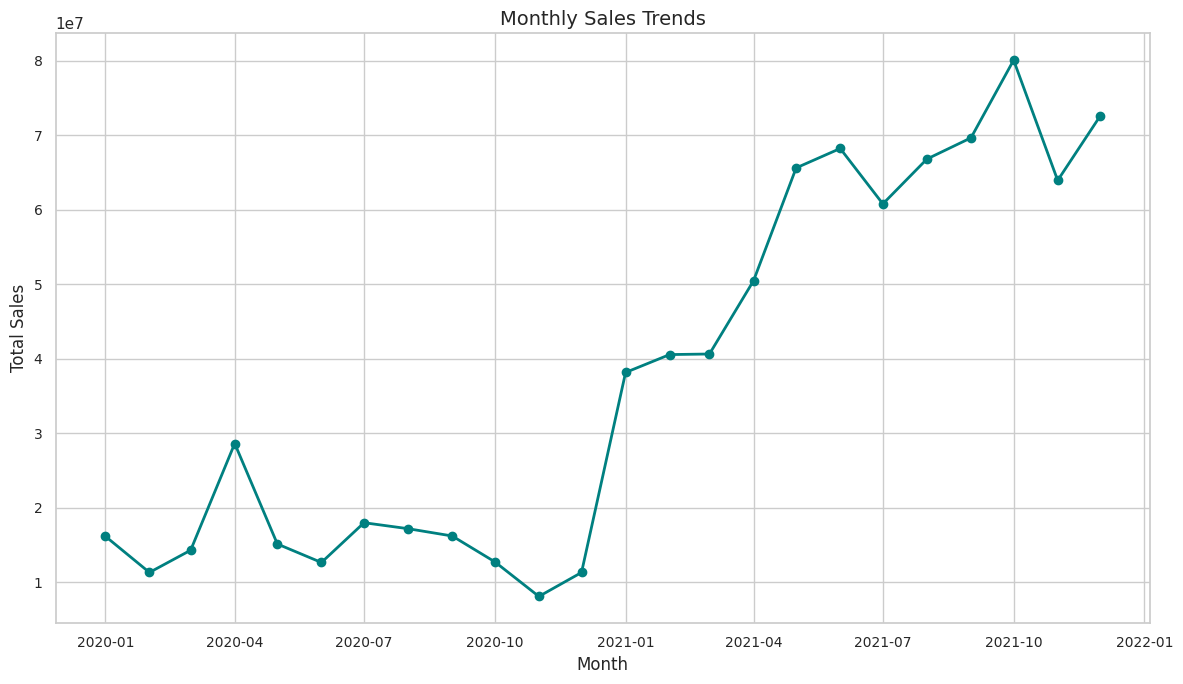

In [ ]:
monthly_sales = data.groupby(data['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

monthly_sales.index = monthly_sales.index.to_timestamp()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal', linestyle='-', linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=14)
plt.xticks(rotation=0)
plt.tick_params(axis='both',which='major',labelsize=10)
plt.tight_layout()
plt.show()

In [ ]:
diff = monthly_sales.diff()

seasonality_threshold = 10000

if(diff.abs()>seasonality_threshold).any():
  print("These sales follow a seasonality.")

else:
  print("These sales do not follow a seasonality.")

if(diff>0).all():
  print("There is an increasing trend in sales.")
elif (diff < 0).all():
    print("There is a decreasing trend in sales.")
else:
    print("There is no consistent trend in sales.")

These sales follow a seasonality.
There is no consistent trend in sales.


Summary:

Monthly sales data from January 2020 to January 2022 exhibit significant variability with notable peaks around April 2021 and consistent increases in December and April of each year, potentially correlating with holiday seasons and sales promotions. The data show a general upward trend in sales over the two-year period, despite some notable dips, particularly in July 2020 and October 2021.

Insights:

The observed seasonal patterns, with sales spikes and dips, highlight the importance of understanding customer purchasing behavior and the impact of seasonality on sales. By leveraging these insights, businesses can align their marketing efforts, inventory management, and resource allocation with anticipated periods of high demand, ensuring that opportunities are maximized during peak seasons. This strategic approach can lead to better preparation for demand surges, improved customer satisfaction, and overall enhanced business performance.

# 9. Predictive Sales Analysis: Develop a forecast for monthly sales.

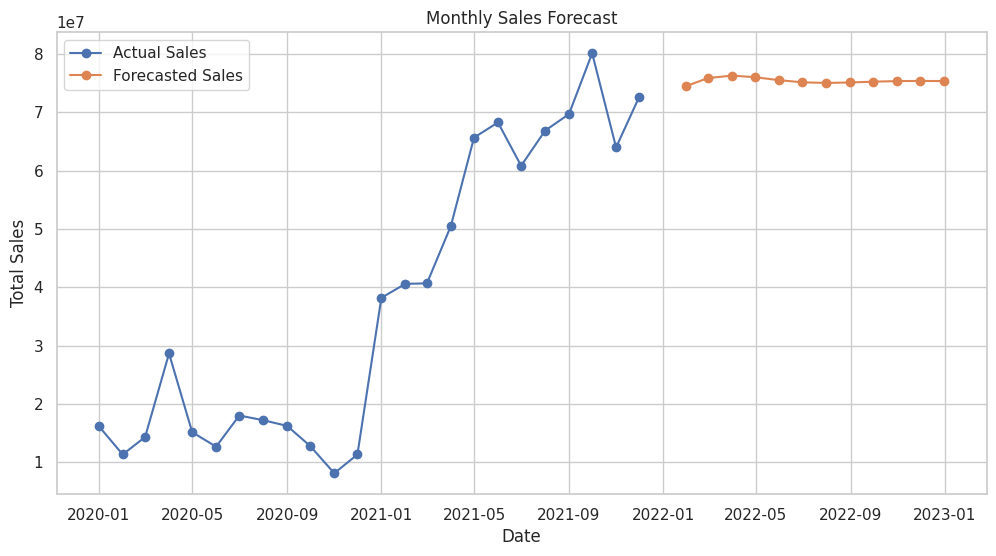

In [ ]:
model = ARIMA(monthly_sales, order=(2,1,2))
model_fit = model.fit()

forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Key Insights:

The graph displays actual and forecasted monthly sales from January 2020 to March 2023. Actual sales peak at 7 million in April 2021 and show volatility, while forecasted sales predict a steadier pattern, mostly ranging between 4 to 6 million, without the extremes seen in actual sales. The forecasted data smoothens the peaks and valleys, indicating a stable sales environment for future planning.